In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.cm as cm
from itertools import combinations

# Hierarchical Clustering

Load the data

In [2]:
C1 = np.loadtxt('C1.txt', delimiter="\t")
C1[:,0] = C1[:,0]-1

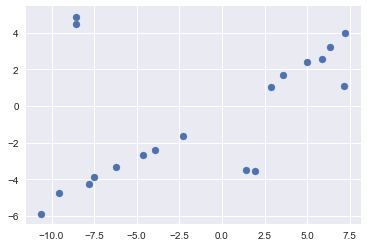

In [3]:
plt.scatter(x=C1[:,1], y=C1[:,2])

**The algorithm that computes the cluster distances and generates clusters.**

In [4]:
import math
def cluster_distance(c1, c2, dist_agg=min):
    return dist_agg([np.linalg.norm(np.array(p0)-np.array(p1)) for p0 in c1 for p1 in c2])

def mean_cluster_distance(c1, c2):
    a1 = np.mean(c1, axis=0)
    a2 = np.mean(c2, axis=0)
    return np.linalg.norm(a1-a2)

In [5]:
def hier_cluster(data, agg=min):
    # init clusters to all be size one
    clusters = {int(row[0]): [[row[1],row[2]]] for row in data}

    # collection of all hierarchies
    levels = []
    levels.append(clusters.copy())

    #----------------------------------------------------------------------#
    # While there is more that one cluster
    while len(clusters) > 1:
        # new set of clusters
        new_clusters = dict()
        # combinations of cluster numbers
        combos = combinations(clusters,2)
        # distance bewtween clusters
        dists = []
        # for each combination of clusters compute the distance
        for i,j in combos:
            if agg == 'avg':
                dists.append([i, j, mean_cluster_distance(clusters[i], clusters[j])])
            else:
                dists.append([i, j, cluster_distance(clusters[i], clusters[j], agg)])

        # find the minimum distance cluster pair
        k,l = dists[np.argmin(np.array(dists)[:,2])][0:2]
        
        #------------------------------------------------------------------#
        # add the new cluster
        new_clusters[k] = []
        # exisitng cluster points
        for i, points in enumerate(clusters[k]):
            new_clusters[k].append(points)
        
        # add the other closest cluster points
        for i, points in enumerate(clusters[l]):
            new_clusters[k].append(points)

        # add remaining clusters to the new cluster structure
        for i, val in clusters.items():
            if i != k and i != l:
                new_clusters[i] = clusters[i]
        
        #-----------------------------------------------------------------#
        # collect the new clustering
        levels.append(new_clusters)
        # update clusters
        clusters = new_clusters
        
    return levels
    

### Single-Link

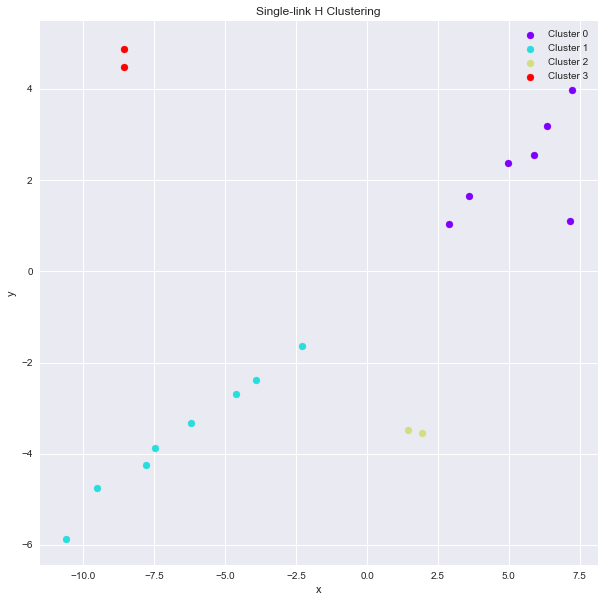

In [6]:
# single link
levels = hier_cluster(C1, min)

level_4 = levels[15]

colors = cm.rainbow(np.linspace(0,1,len(level_4)))

plt.figure(figsize=(10,10))

for i, (c, points) in enumerate(level_4.items()):
    p = np.array(points)
    plt.scatter(x=p[:,0], y=p[:,1], color=colors[i], label='Cluster ' + str(i))
    
plt.title("Single-link H Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('single-link.png')

### Complete-Link

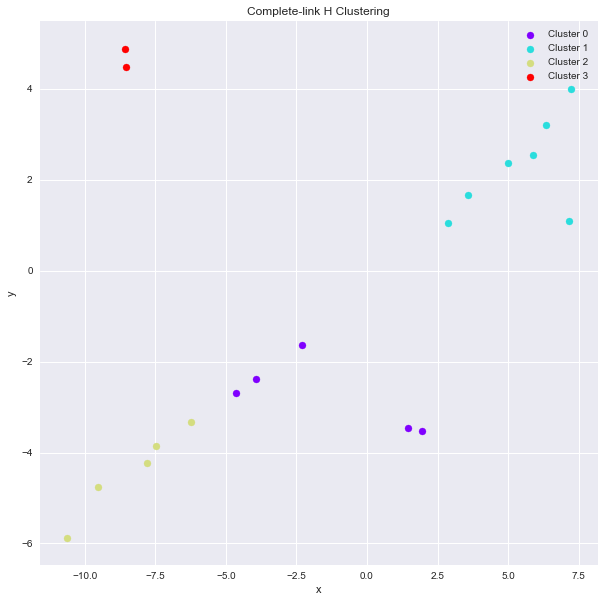

In [7]:
# complete link
levels = hier_cluster(C1, max)

level_4 = levels[15]

colors = cm.rainbow(np.linspace(0,1,len(level_4)))

plt.figure(figsize=(10,10))

for i, (c, points) in enumerate(level_4.items()):
    p = np.array(points)
    plt.scatter(x=p[:,0], y=p[:,1], color=colors[i], label='Cluster ' + str(i))
    
plt.title("Complete-link H Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('complete-link.png')

### Mean-Link

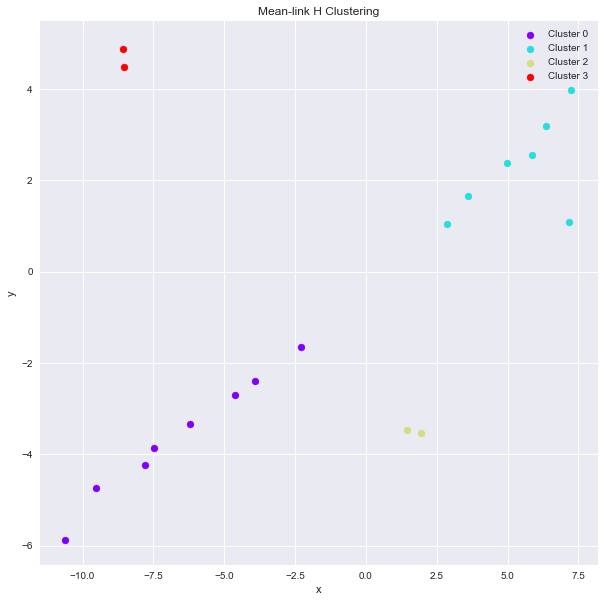

In [8]:
# mean link
levels = hier_cluster(C1, 'avg')

level_4 = levels[15]

colors = cm.rainbow(np.linspace(0,1,len(level_4)))

plt.figure(figsize=(10,10))

for i, (c, points) in enumerate(level_4.items()):
    p = np.array(points)
    plt.scatter(x=p[:,0], y=p[:,1], color=colors[i], label='Cluster ' + str(i))
    
plt.title("Mean-link H Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('mean-link.png')

# Assignment-Based Clustering

In [9]:
# read file
C2 = np.loadtxt('C2.txt', delimiter="\t")
C2[:,0] = C2[:,0]-1
C2

array([[ 0.0000000e+00, -4.4357274e+00, -5.6060004e+00],
       [ 1.0000000e+00, -5.7378081e+00, -6.7261898e+00],
       [ 2.0000000e+00, -3.3755073e+00, -6.8078161e+00],
       ...,
       [ 1.0370000e+03,  3.0845315e+00,  5.5277916e+00],
       [ 1.0380000e+03,  4.0318798e+00,  6.0889174e+00],
       [ 1.0390000e+03,  0.0000000e+00, -4.0000000e+01]])

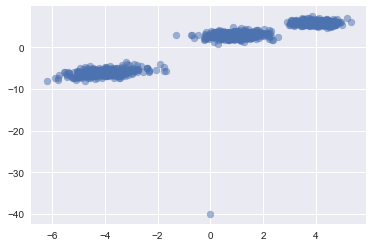

In [10]:
plt.scatter(x=C2[:,1], y=C2[:,2], alpha=.5)

## Gonzalez

In [11]:
# Gonzalez
def G_cluster(data, k):
    phi = [0 for _ in data]
    s = []
    s.append(data[0])
    
    for i in range(1, k):
        M = 0
        s.append(data[0])
        for j in range(0,data.shape[0]):
            if np.linalg.norm(data[j,1:] - s[phi[j]][1:]) > M:
                M = np.linalg.norm(data[j,1:]-s[phi[j]][1:])
                s[i] = data[j]

        for j in range(0,data.shape[0]):
            if np.linalg.norm(data[j,1:] - s[phi[j]][1:]) > np.linalg.norm(data[j,1:] - s[i][1:]):
                phi[j] = i
    
    return np.array(s), np.array(phi)
    
G, phi = G_cluster(C2,3)

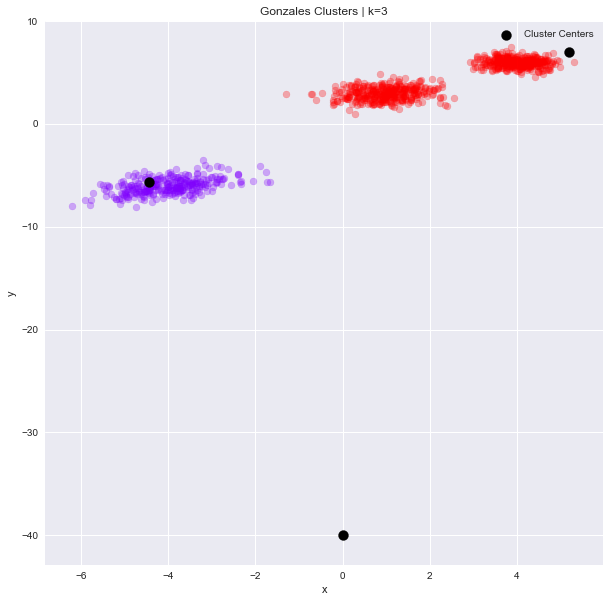

In [12]:
plt.figure(figsize=(10,10))

colors = cm.rainbow(np.linspace(0,1,len(G)))

for i, j in enumerate(phi):
    plt.scatter(x=C2[i,1], y=C2[i,2], alpha=.3, color=colors[j])
plt.scatter(x=G[:,1], y=G[:,2], s=100, c='K', label='Cluster Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gonzales Clusters | k=3')
plt.legend()
plt.savefig('gonzalez.png')

In [13]:
center_cost = np.max([np.linalg.norm(C2[i,1:]-G[phi[i],1:]) for i in range(C2.shape[0])])
center_cost

7.7721092399481115

In [14]:
mean_cost = math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-G[phi[i],1:])**2 for i in range(C2.shape[0])]))
mean_cost

3.69429550745938

## k-Means++

In [15]:
import random as rand

# k-means++
def plusplus_cluster(data, k):
    phi = [0 for _ in data]
    s = []
    s.append(data[0])
    
    for i in range(1, k):
        W = np.sum([np.linalg.norm(data[j,1:] - s[phi[j]][1:])**2 for j in range(data.shape[0])])
        w = [np.linalg.norm(data[j,1:] - s[phi[j]][1:])**2/W for j in range(0,data.shape[0])]
        ws = np.cumsum(w)
        
        p = rand.uniform(0,1)
        k = np.argmax(ws>p)
        s.append(data[k])
        
        for j in range(0,data.shape[0]):
                if np.linalg.norm(data[j,1:] - s[phi[j]][1:]) > np.linalg.norm(data[j,1:] - s[i][1:]):
                    phi[j] = i
    
    return np.array(s), np.array(phi)
                                                                  
cs, phi = plusplus_cluster(C2,3)
cs

array([[  0.       ,  -4.4357274,  -5.6060004],
       [429.       ,   0.9931496,   3.5910289],
       [982.       ,   3.6948793,   5.7735231]])

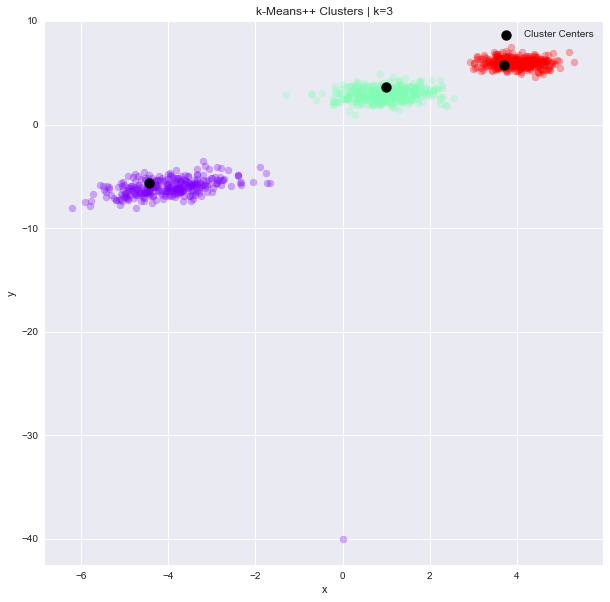

In [16]:
plt.figure(figsize=(10,10))

colors = cm.rainbow(np.linspace(0,1,len(G)))

for i, j in enumerate(phi):
    plt.scatter(x=C2[i,1], y=C2[i,2], alpha=.3, color=colors[j])
plt.scatter(x=cs[:,1], y=cs[:,2], s=100, c='K', label='Cluster Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('k-Means++ Clusters | k=3')
plt.legend()
plt.show()

In [17]:
mean_cost = math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])]))
mean_cost

1.4826466476692626

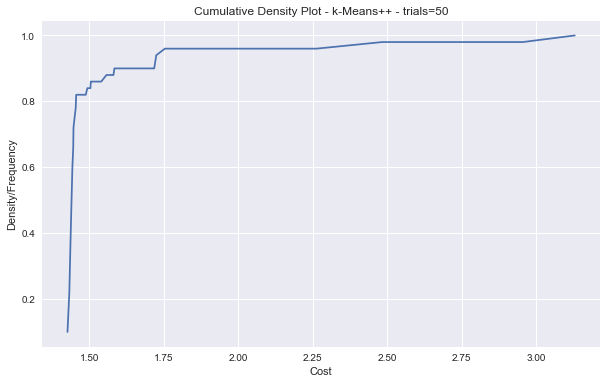

In [18]:
from scipy.stats import cumfreq
t=50

costs = []
gonzal_comp = []
for _ in range(t):
    cs, phi = plusplus_cluster(C2,3)
    costs.append(math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])])))
    gonzal_comp.append(np.array_equal(G,cs))
    
plt.figure(figsize=(10,6))
plt.plot(np.sort(costs), cumfreq(np.sort(costs), numbins=len(costs))[0]/len(costs))
plt.title('Cumulative Density Plot - k-Means++ - trials={}'.format(t))
plt.xlabel('Cost')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('kmeanspluscdf.png')

In [19]:
sum(gonzal_comp)/len(gonzal_comp)

0.0

## Lloyd's Algorithm

In [20]:
import random as rand

# lloyds
def lloyds_cluster(data, k, init, niter=20):
    phi = np.array([0 for _ in data])
    
    if init == 'k-means++':   
        s = []
        s.append(data[0])
        for i in range(1, k):
            W = np.sum([np.linalg.norm(data[j,1:] - s[phi[j]][1:])**2 for j in range(data.shape[0])])
            w = [np.linalg.norm(data[j,1:] - s[phi[j]][1:])**2/W for j in range(0,data.shape[0])]
            ws = np.cumsum(w)

            p = rand.uniform(0,1)
            l = np.argmax(ws>p)
            s.append(data[l])

            for j in range(0,data.shape[0]):
                if np.linalg.norm(data[j,1:] - s[phi[j]][1:]) > np.linalg.norm(data[j,1:] - s[i][1:]):
                    phi[j] = i
    else:
        s = init
        
    # run lloyds on the new centers
    s = np.array(s)[:,1:]
    for _ in range(niter):
        olds = s.copy()
        for i in range(0,k):
            for j in range(0,data.shape[0]):
                if np.linalg.norm(data[j,1:] - s[phi[j]]) > np.linalg.norm(data[j,1:] - s[i]):
                    phi[j] = i

        for j in range(0,k):
            Xi = data[phi == j]
            s[j] = np.mean(Xi[:,1:], axis=0)

        if np.allclose(s, olds):
            print('Converged after {} iterations'.format(_))
            niter = _
            break
    
    for i in range(0,k):
        for j in range(0,data.shape[0]):
            if np.linalg.norm(data[j,1:] - s[phi[j]]) > np.linalg.norm(data[j,1:] - s[i]):
                phi[j] = i
        
    
    return np.array(s), np.array(phi), niter
                                                                  
cs, phi, n = lloyds_cluster(C2,3, C2[:3])
cs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


Converged after 11 iterations


array([[ 2.49628862,  4.47085919],
       [-4.55534263, -6.88958718],
       [-3.58716893, -5.5588541 ]])

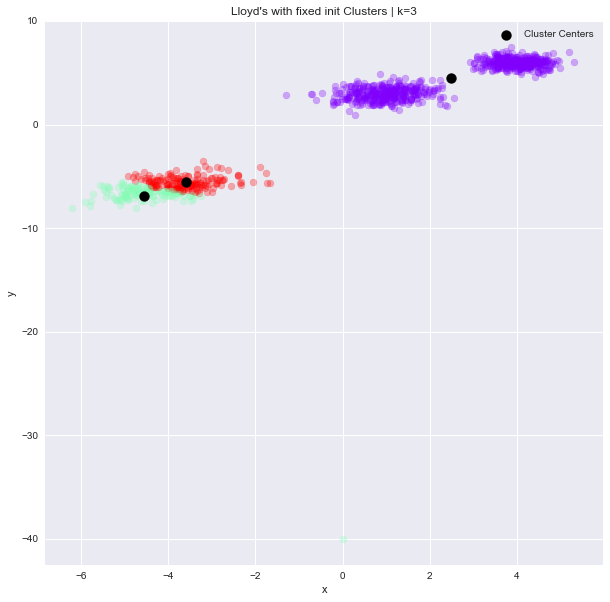

In [21]:
plt.figure(figsize=(10,10))

colors = cm.rainbow(np.linspace(0,1,len(G)))

for i, j in enumerate(phi):
    plt.scatter(x=C2[i,1], y=C2[i,2], alpha=.3, color=colors[j])
plt.scatter(x=cs[:,0], y=cs[:,1], s=100, c='K', label='Cluster Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lloyd\'s with fixed init Clusters | k=3')
plt.legend()
plt.savefig('lloydsfixedinit.png')

In [22]:
mean_cost = math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])]))
mean_cost = math.sqrt(np.mean([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])]))
mean_cost

3.0010488357471474

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


Converged after 1 iterations


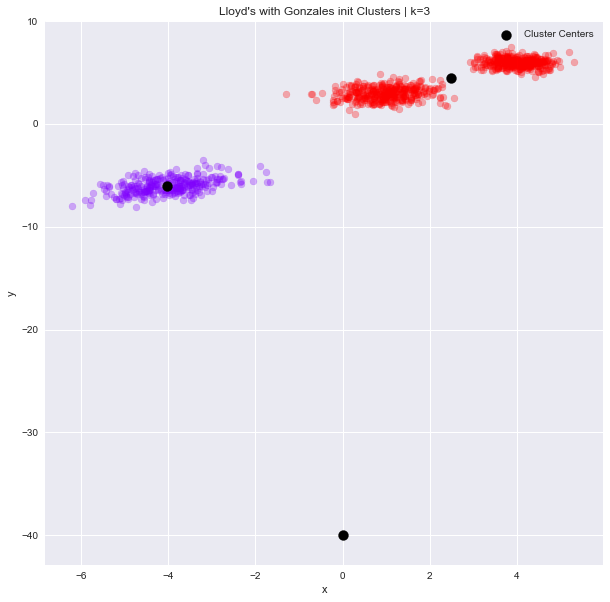

In [23]:
cs, phi, n = lloyds_cluster(C2,3, G)
cs

plt.figure(figsize=(10,10))

for i, j in enumerate(phi):
    plt.scatter(x=C2[i,1], y=C2[i,2], alpha=.3, color=colors[j])
plt.scatter(x=cs[:,0], y=cs[:,1], s=100, c='K', label='Cluster Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lloyd\'s with Gonzales init Clusters | k=3')
plt.legend()
plt.savefig('lloydsgonzalinit.png')

In [24]:
mean_cost = math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])]))
mean_cost

3.074664857699056

Converged after 1 iterations


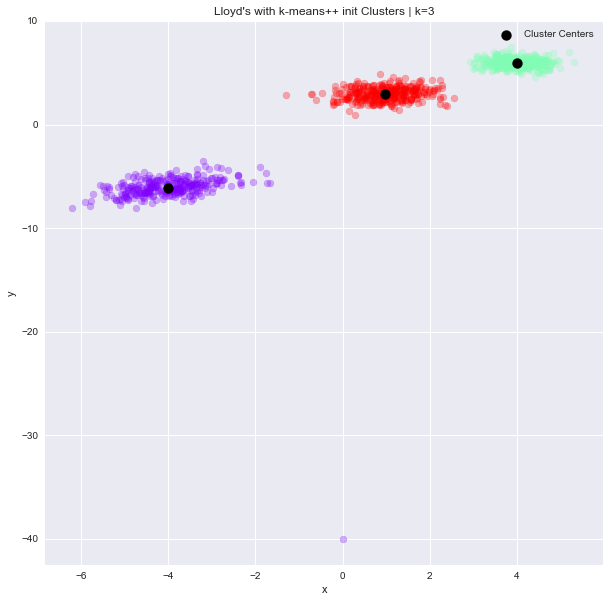

In [25]:
cs, phi, n = lloyds_cluster(C2, 3, 'k-means++')
cs

plt.figure(figsize=(10,10))

for i, j in enumerate(phi):
    plt.scatter(x=C2[i,1], y=C2[i,2], alpha=.3, color=colors[j])
plt.scatter(x=cs[:,0], y=cs[:,1], s=100, c='K', label='Cluster Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lloyd\'s with k-means++ init Clusters | k=3')
plt.legend()
plt.show()

Converged after 2 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 9 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 4 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged afte

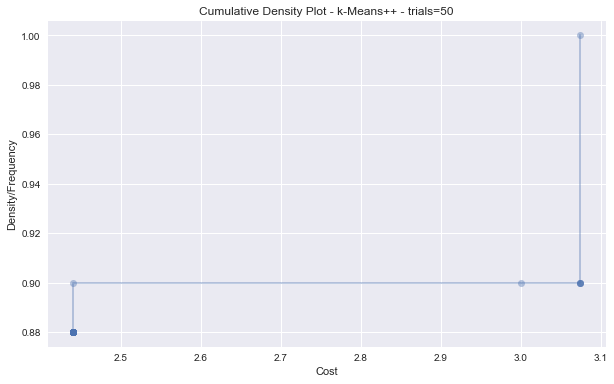

In [26]:
from scipy.stats import cumfreq
t=50

costs = []
plusplus_comp = 0
for _ in range(t):
    cs, phi, n = lloyds_cluster(C2,3, init='k-means++')
    costs.append(math.sqrt((1/C2.shape[0])*sum([np.linalg.norm(C2[i,1:]-cs[phi[i],1:])**2 for i in range(C2.shape[0])])))
    if n == 1:
        plusplus_comp += 1
        
print(plusplus_comp/t)
    
plt.figure(figsize=(10,6))
plt.plot(np.sort(costs), cumfreq(np.sort(costs), numbins=len(costs))[0]/len(costs), marker='o', alpha=.4)
plt.title('Cumulative Density Plot - k-Means++ - trials={}'.format(t))
plt.xlabel('Cost')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('kmeansplusloydcdf.png')

In [27]:
min(costs)

2.440172238553457